# Customer Segmentation Analysis  --- RFM Analysis

## Background

Based on the marketing adage that "80% of your business comes from 20% of your customers." The retail company A wants to get a deep understanding about their customers from all over the world. The RFM analysis is used to quantitatively rank and group customers based on the recency, frequency and monetary. The result will help the compnay to identify the best customers and therefor perform targeted marketing campaigns. 

## 1. Data Preparing

### 1.1 Data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.shape

(541909, 8)

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


### 1.2 Data preprocessing

#### 1.2.1 Find missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


·CustomerID: there are many missing values, and the orders of these are meaningless, so we delete them.\
·CustomerID: it is float64, so we should change it to string.\
·Description: there are some missing values, but it does not influence analysis, so we can fill them with 'Nah'\
·InvoiceNo: it is obeject, which means the invoice number consists numbers and string\
·InvoiceDate: it is object, so we should change it to datetime. 

In [6]:
data.dropna(subset=['CustomerID'],inplace = True)

In [7]:
data['CustomerID'] = data['CustomerID'].astype(np.int32)

In [8]:
data['Description'].fillna('Nah', inplace = True)

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


#### 1.2.2 Find outliers

In [11]:
# stastical information
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

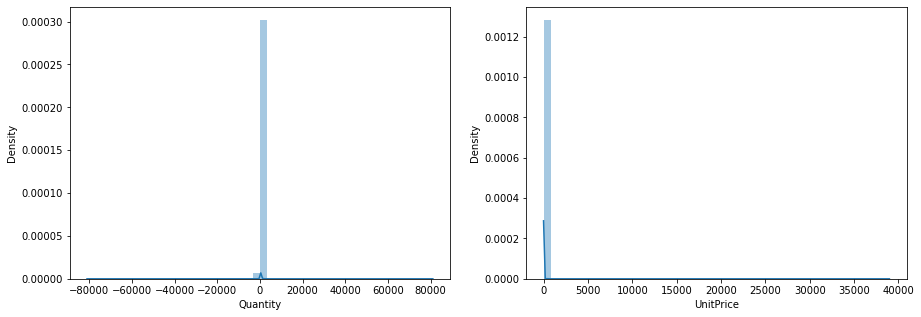

In [12]:
# data distribution
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
sns.distplot(data["Quantity"], ax=ax[0])
sns.distplot(data["UnitPrice"], ax=ax[1])

<AxesSubplot:ylabel='UnitPrice'>

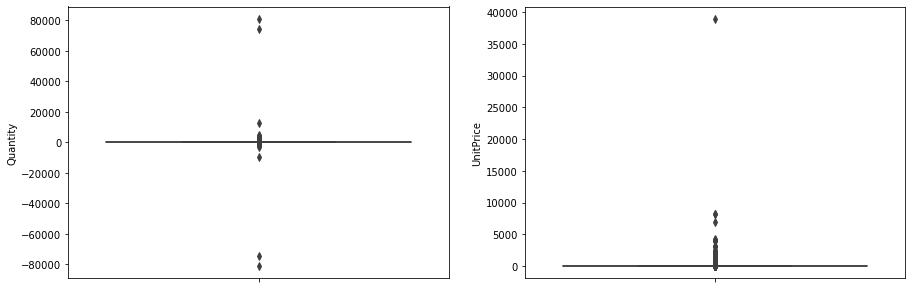

In [13]:
# boxplot
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
sns.boxplot(y="Quantity", data=data, ax=ax[0])
sns.boxplot(y="UnitPrice",data=data, ax=ax[1])

#### 1.2.3 Find duplicates

In [14]:
data.duplicated().sum()

5225

In [15]:
data[data.duplicated(keep=False)].sort_values(by=["InvoiceNo", "StockCode"]).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom


## 2. RFM Model

### 2.1 Calculate monetary

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

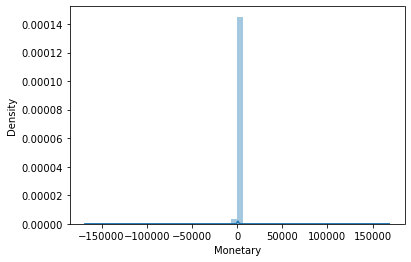

In [16]:
data['Monetary'] = data['Quantity'] * data['UnitPrice']
sns.distplot(data["Monetary"])

### 2.2  R value 

In [17]:
rfm = pd.DataFrame()
g = data.groupby("CustomerID")
current_date = pd.to_datetime("2012-01-01 00:00:00")

In [18]:
def build_R(ga,tomorrow, third):
    # exclude returned orders
    ods_wto_r = ga[~ga['InvoiceNo'].str.startswith('C')]
    # if the orders of customer are all returned, then regard the earliest purchase date of the data as the last purchase date
    if len(ods_wto_r) == 0:
        date_diff = pd.to_datetime('2012-01-01') - data["InvoiceDate"].min()
    else:
    # calculate the gap between the current date and the last order date of each customer
        date_diff = pd.to_datetime('2012-01-01') - ods_wto_r["InvoiceDate"].max()
    return date_diff.days

In [19]:
rfm['Recency'] = g.apply(build_R, 'like', 'what')

In [20]:
rfm.head()

,Recency
CustomerID,
12346,347
12347,24
12348,97
12349,40
12350,332


### 2.3 F value

In [21]:
def build_F(group_data):
    # check if the order is refund
    is_refund = group_data['InvoiceNo'].str.startswith('C')
    # acquire all nornal and refund records
    normal = group_data[~is_refund]
    refund = group_data[is_refund]
    # normal orders - refund orders =  all orders of a customer
    num = normal["InvoiceNo"].unique().shape[0] - refund["InvoiceNo"].unique().shape[0]
    # if orders number < 0, it means a custimer did not have any order during the given period, so we regard the orders number as 0
    return num if num>0 else 0

In [22]:
rfm["Frequency"] = g.apply(build_F)

In [23]:
rfm.head()

,Recency,Frequency
CustomerID,,
12346,347,0
12347,24,7
12348,97,4
12349,40,1
12350,332,1


### 2.4 M value

In [24]:
def build_M(group_data):
    money = group_data['Monetary'].sum()
    # if sum money < 0, it means a customer did not spend money during the period given, so we regard the total money as 0
    return money if money>0 else 0

In [25]:
rfm['Monetary'] = g.apply(build_M)

In [26]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,347,0,0.00
12347,24,7,4310.00
12348,97,4,1797.24
12349,40,1,1757.55
12350,332,1,334.40


### 2.5 Evaluate customer level

At this point, we have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 5 for each parameter.\
We can do this by setting ranges based on expected behavior. For example, to rate Recency, we could use this scale:\
1: 0-30 days\
2: 31-60 days\
3: 61-90 days\
4: 91-180 days\
5: 181-365 days\

In [27]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

In [28]:
quintiles

{'Recency': {0.2: 36.0, 0.4: 54.40000000000009, 0.6: 94.0, 0.8: 206.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 4.0},
 'Monetary': {0.2: 234.39200000000002,
  0.4: 465.412,
  0.6: 909.1339999999999,
  0.8: 2002.0920000000003}}

In [29]:
# assign ranks from 1 to 5. A smaller Recency value is better whereas higher Frequency and Monetary values are better.
def r_score(x):
    if x<= quintiles['Recency'][0.2]:
        return 5
    elif x<=quintiles['Recency'][0.4]:
        return 4
    elif x<=quintiles['Recency'][0.6]:
        return 3
    elif x<=quintiles['Recency'][0.8]:
        return 2
    else:
        return 1

def f_score(x):
    if x< quintiles['Frequency'][0.2]:
        return 1
    elif x<quintiles['Frequency'][0.4]:
        return 2
    elif x<quintiles['Frequency'][0.6]:
        return 3
    elif x<quintiles['Frequency'][0.8]:
        return 4
    else:
        return 5

def m_score(x):
    if x<= quintiles['Monetary'][0.2]:
        return 1
    elif x<=quintiles['Monetary'][0.4]:
        return 2
    elif x<=quintiles['Monetary'][0.6]:
        return 3
    elif x<=quintiles['Monetary'][0.8]:
        return 4
    else:
        return 5

In [30]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [31]:
# combine the R,F,M scores into a RFM Score
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [32]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346,347,0,0.00,1,1,1,111
12347,24,7,4310.00,5,5,5,555
12348,97,4,1797.24,2,5,4,254
12349,40,1,1757.55,4,3,4,434
12350,332,1,334.40,1,3,2,132


Description of segments:
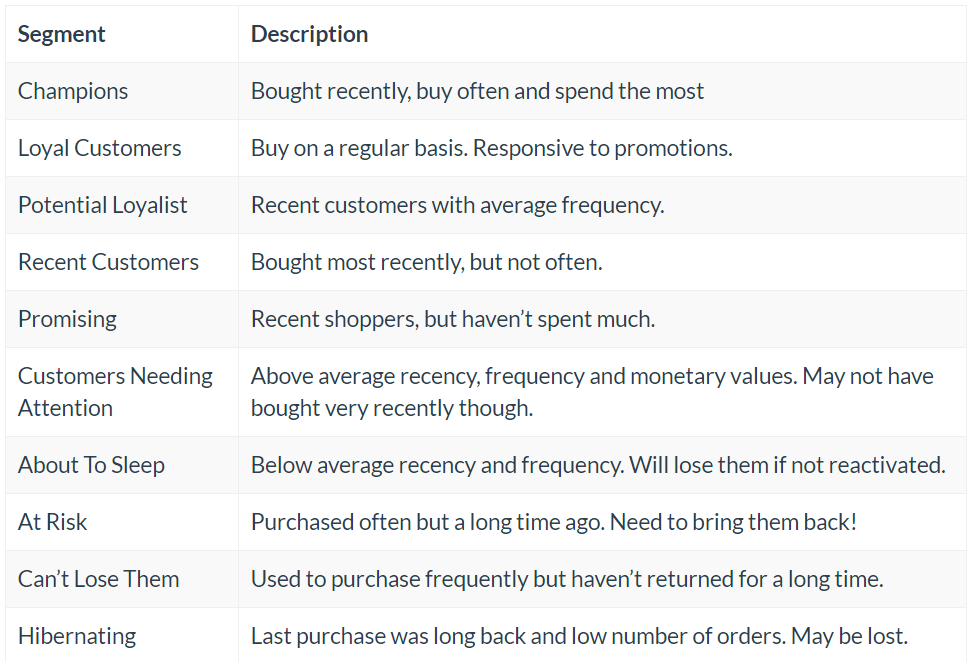

In [33]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': "can't loose",
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}
segt_map

{'[1-2][1-2]': 'hibernating',
 '[1-2][3-4]': 'at risk',
 '[1-2]5': "can't loose",
 '3[1-2]': 'about to sleep',
 '33': 'need attention',
 '[3-4][4-5]': 'loyal customers',
 '41': 'promising',
 '51': 'new customers',
 '[4-5][2-3]': 'potential loyalists',
 '5[4-5]': 'champions'}

In [34]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346,347,0,0.00,1,1,1,111,11
12347,24,7,4310.00,5,5,5,555,55
12348,97,4,1797.24,2,5,4,254,25
12349,40,1,1757.55,4,3,4,434,43
12350,332,1,334.40,1,3,2,132,13


In [35]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346,347,0,0.00,1,1,1,111,hibernating
12347,24,7,4310.00,5,5,5,555,champions
12348,97,4,1797.24,2,5,4,254,can't loose
12349,40,1,1757.55,4,3,4,434,potential loyalists
12350,332,1,334.40,1,3,2,132,at risk


In [36]:

for i,b in enumerate(['R', 'F']):
    print(i,b)

0 R
1 F


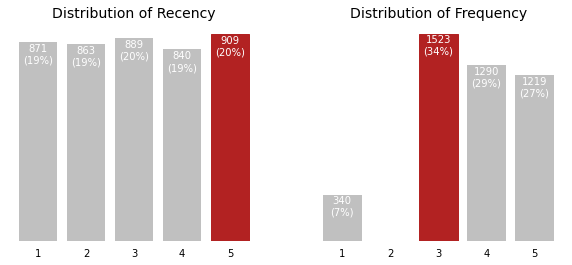

In [37]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

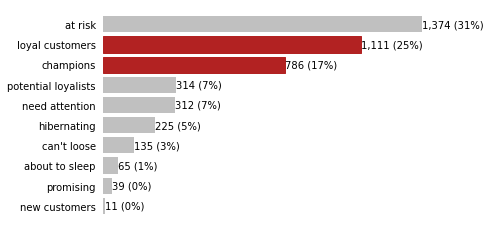

In [38]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

We have a lot of customers who don't buy frequently from us (25% are hibernating). However, 31% of our customers are either champions or loyal customers.

In [42]:
X = rfm.iloc[:, :-1]

In [43]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_scale = s.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=X.columns, index=X.index)
X_scale.head()


,Recency,Frequency,Monetary,R,F,M,RFM Score
CustomerID,,,,,,,
12346,2.251129,-0.542685,-0.231399,-1.416453,-2.426658,-1.413890,-1.551877
12347,-0.898765,0.566089,0.293102,1.399385,1.172171,1.413890,1.441527
12348,-0.186869,0.090900,-0.012686,-0.712493,1.172171,0.706945,-0.587785
12349,-0.742733,-0.384288,-0.017516,0.695426,-0.627243,0.706945,0.625757
12350,2.104849,-0.384288,-0.190705,-1.416453,-0.627243,-0.706945,-1.410297


<AxesSubplot:>

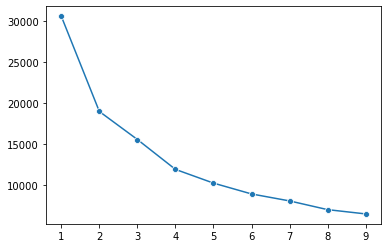

In [45]:
from sklearn.cluster import KMeans

# define the K value
scope = range(1, 10)
# define SSE
sse = []
for k in scope:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scale)
    sse.append(kmeans.inertia_)
plt.xticks(scope)
sns.lineplot(x=scope, y=sse, marker="o")

In [46]:
from kneed import KneeLocator
kl = KneeLocator(scope, sse, curve="convex", direction="decreasing" )

kl.elbow

4

In [50]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scale)

print("Mass：", kmeans.cluster_centers_)

print("label：", kmeans.labels_)

print("SSE：", kmeans.inertia_)

print("n_iter：", kmeans.n_iter_)

print("Score：", kmeans.score(X_scale))

Mass： [[-0.73176432  0.4778166   0.17140851  0.94264688  0.89219443  0.93652253
   0.97857103]
 [ 1.56521059 -0.36613404 -0.1795207  -1.29811792 -0.78965457 -0.78864554
  -1.30991569]
 [-0.29658054 -0.27217393 -0.14947699 -0.03044846 -0.27934992 -0.3181446
  -0.05312779]
 [-0.86232304  9.31122712 10.99068288  1.28823391  1.17217111  1.4138902
   1.33507605]]
label： [1 0 2 ... 2 0 2]
SSE： 11880.399177515206
n_iter： 15
Score： -11880.399177515206


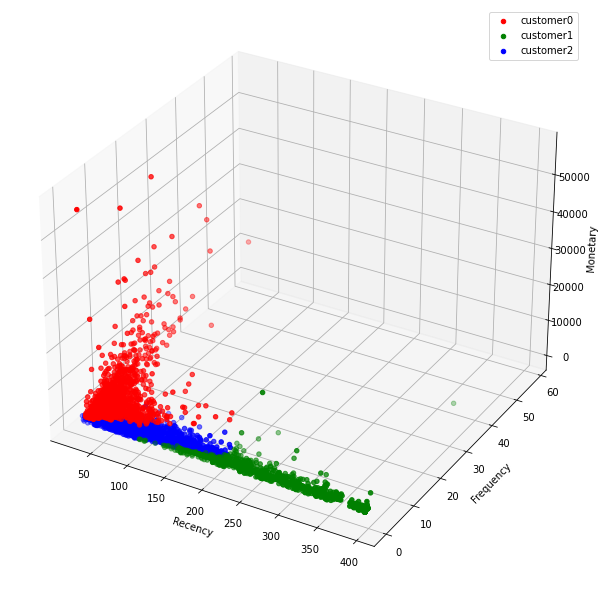

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = Axes3D(fig)
color = ["r", "g", "b"]
for i in range(3):
    d = X[kmeans.labels_ == i]
    ax.scatter(d["Recency"], d["Frequency"], d["Monetary"], color=color[i], label=f"customer{i}")
ax.set_zlabel("Monetary")
ax.set_ylabel("Frequency")
ax.set_xlabel("Recency")
plt.legend()